<a href="https://colab.research.google.com/github/Scmelor/Radiative-Transfer-con-MC/blob/main/Tarea_computacional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

In [6]:
# Constantes
ri = 15  # Radio interior AU
ro = 20  # Radio exterior AU
N = 1000
altura_maxima = 20  # Altura máxima en z
repeticiones = 100  # Número de repeticiones
repeticiones_maximas = 1000  # Número máximo de repeticiones

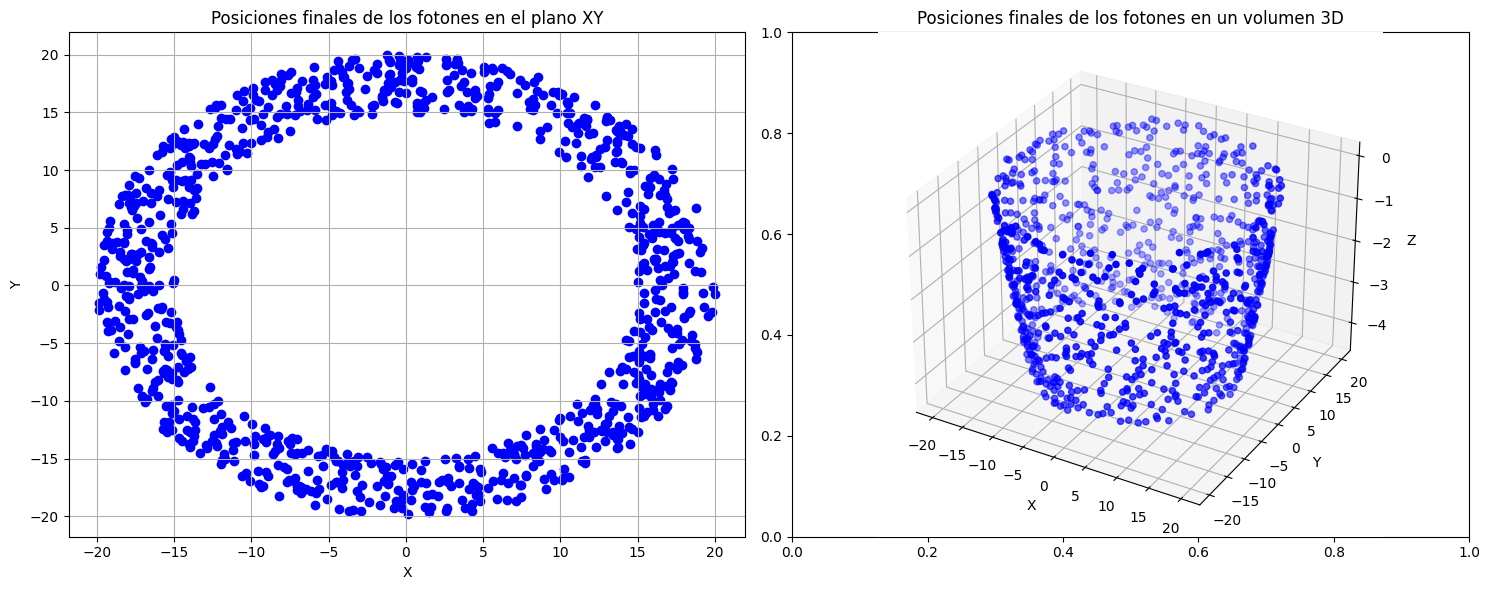

In [14]:
# Lista para almacenar las posiciones iniciales de los fotones en 3D
posiciones_3D = []

# Generar posiciones iniciales para N fotones
for _ in range(N):
    # Generar valores aleatorios para phi y r entre 0 y 1
    R_phi = random.random()
    R_r = random.random()

    # Cálculo del ángulo phi
    phi = 2 * math.pi * R_phi

    # Cálculo del radio de emisión
    r = math.sqrt(ri**2 + (ro**2 - ri**2) * R_r)

    # Calcular z
    a = 1 / (2 * ro)
    z = a * (r**2 - ro**2)

    # Agregar la posición del fotón en 3D a la lista
    posiciones_3D.append((r * math.cos(phi), r * math.sin(phi), z))

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Extraer las coordenadas x, y, z del plano XY
x = [pos[0] for pos in posiciones_3D]
y = [pos[1] for pos in posiciones_3D]
z = [pos[2] for pos in posiciones_3D]

# Graficar solo el plano XY en el primer subplot
axs[0].scatter(x, y, c='b', marker='o')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Posiciones finales de los fotones en el plano XY')
axs[0].grid(True)

# Graficar las posiciones de los fotones en 3D en el segundo subplot
axs[1] = fig.add_subplot(122, projection='3d')
axs[1].scatter(x, y, z, c='b', marker='o')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Z')
axs[1].set_title('Posiciones finales de los fotones en un volumen 3D')
axs[1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [15]:
# Función para calcular l_kappa y l_sigma
def calcular_distancias(ro, kappa_lambda, sigma_lambda):
    l_kappa = ro * 1.61 / kappa_lambda
    l_sigma = ro * 1.25 / sigma_lambda
    return l_kappa, l_sigma

In [16]:
# Función para calcular R_kappa y R_sigma
def calcular_energia(l_kappa, l_sigma):
    R_kappa = math.exp(-l_kappa)
    R_sigma = math.exp(-l_sigma)
    return R_kappa, R_sigma

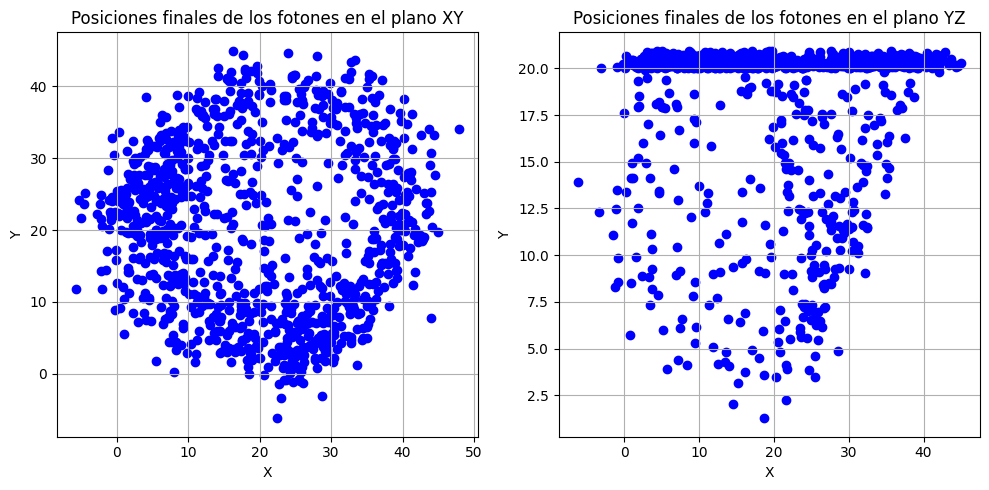

In [18]:
# Lista para almacenar las posiciones de los fotones y variables de energía
datos_fotones = []

# Agregar la posición del fotón en 3D a la lista
posiciones_3D.append((r * math.cos(phi), r * math.sin(phi), z))
# Seguir el movimiento de los fotones hasta alcanzar la altura máxima
for i in range(N):
    # Generar valores aleatorios para phi y r entre 0 y 1
    R_phi = random.random()
    R_r = random.random()

    # Cálculo del ángulo phi
    phi = 2 * math.pi * R_phi

    # Cálculo del radio de emisión
    r = math.sqrt(ri**2 + (ro**2 - ri**2) * R_r)
    x=r * math.cos(phi)
    y= r * math.sin(phi)
    # Calcular z
    a = 1 / (2 * ro)
    z = a * (r**2 - ro**2)

    # Generar valores aleatorios para k_lambda y sigma_lambda entre 0 y 1
    k_lambda = random.random()
    sigma_lambda = random.random()

    # Calcular l_kappa y l_sigma para esta posición
    l_kappa, l_sigma = calcular_distancias(ro, k_lambda, sigma_lambda)

    # Calcular R_kappa y R_sigma
    R_kappa, R_sigma = calcular_energia(l_kappa, l_sigma)

    # Guardar las posiciones y variables de energía iniciales
    datos_fotones.append((x, y, z, R_kappa, R_sigma))

    # Seguir el movimiento del fotón hasta alcanzar la altura máxima
    for j in range(repeticiones_maximas):
        # Calcular nueva posición del fotón (aleatoria)
        x += random.uniform(0, 1)  # Movimiento en dirección x
        y += random.uniform(0, 1)  # Movimiento en dirección y
        z += random.uniform(0, 1)  # Movimiento en dirección z

        # Verificar si el fotón alcanza la altura máxima
        if z >= altura_maxima:
            break

        # Verificar si la distancia recorrida en la posición actual es mayor que l_kappa
        if np.linalg.norm((x, y, z)) > l_kappa:
            # El fotón es absorbido
            R_kappa = calcular_energia(l_kappa, k_lambda)
        elif np.linalg.norm((x, y, z)) > l_sigma:
            # Se produce dispersión
            l_sigma = 0.36 * ro  # Actualizar l_sigma

            # Se produce absorción, calcular R_kappa y R_sigma
            R_sigma = calcular_energia(l_sigma, sigma_lambda)

            # Guardar las posiciones y variables de energía
            datos_fotones[i] = (x, y, z, R_kappa, R_sigma)

            # Reiniciar iteración con nuevas distancias
            break
        else:
            # Continuar movimiento del fotón
            continue

    # Guardar las posiciones y variables de energía
    datos_fotones[i] = (x, y, z, R_kappa, R_sigma)
#lucas
#datos_fotones.sum()/len(datos_fotones)

# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Extraer las coordenadas x, y, z del plano XY
x1 = [pos[0] for pos in datos_fotones]
y1 = [pos[1] for pos in datos_fotones]
z1 = [pos[2] for pos in datos_fotones]

# Graficar solo el plano XY en el primer subplot
axs[0].scatter(x1, y1, c='b', marker='o')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Posiciones finales de los fotones en el plano XY')
axs[0].grid(True)

# Graficar solo el plano YZ en el primer subplot
axs[1].scatter(y1, z1, c='b', marker='o')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Posiciones finales de los fotones en el plano YZ')
axs[1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

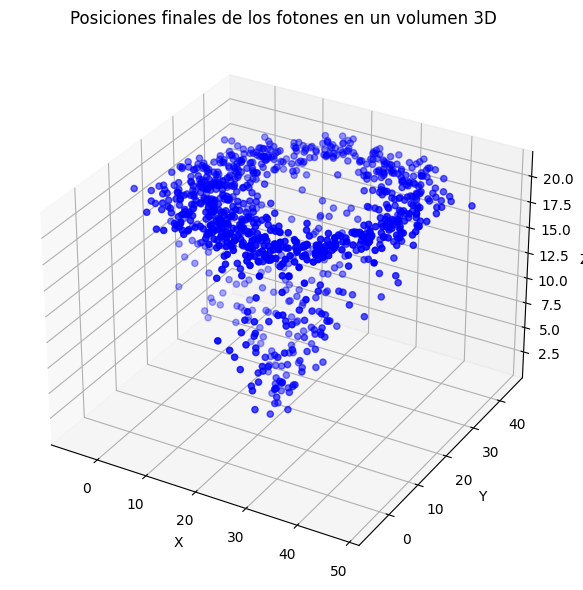

In [19]:
# Crear una figura con un solo subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Extraer las coordenadas x, y, z del conjunto de datos de fotones
x1 = [pos[0] for pos in datos_fotones]
y1 = [pos[1] for pos in datos_fotones]
z1 = [pos[2] for pos in datos_fotones]

# Graficar las posiciones de los fotones en 3D
ax.scatter(x1, y1, z1, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Posiciones finales de los fotones en un volumen 3D')
ax.grid(True)

# Mostrar la figura
plt.tight_layout()
plt.show()

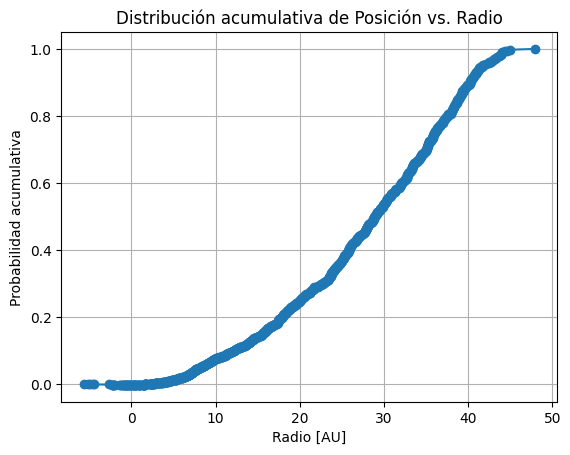

In [20]:
# Recopilar los radios finales de los fotones
radios_finales = [pos[0] for pos in datos_fotones]

# Calcular la distribución acumulativa de los radios finales
radios_ordenados = sorted(radios_finales)
prob_acumulativa = np.cumsum(radios_ordenados) / sum(radios_ordenados)

# Visualización gráfica
plt.plot(radios_ordenados, prob_acumulativa, marker='o')
plt.title('Distribución acumulativa de Posición vs. Radio')
plt.xlabel('Radio [AU]')
plt.ylabel('Probabilidad acumulativa')
plt.grid(True)
plt.show()

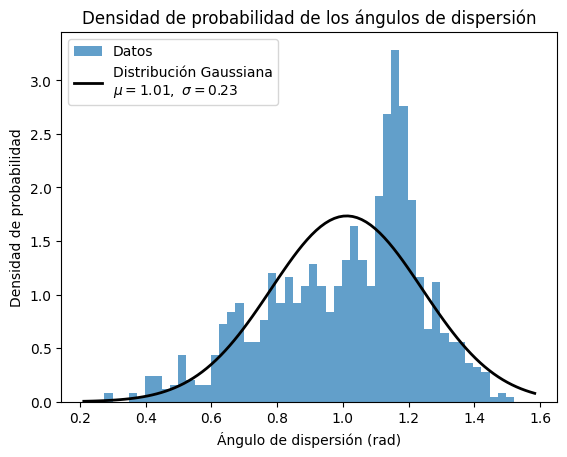

In [21]:
# Calcular los ángulos de dispersión a partir de las posiciones finales
angulos_dispersión = []
for pos in datos_fotones:
    x, y, z, _, _ = pos
    angulos_dispersión.append(np.arccos(z / np.sqrt(x**2 + y**2 + z**2)))

# Graficar el histograma de los ángulos de dispersión
plt.hist(angulos_dispersión, bins=50, density=True, alpha=0.7, label='Datos')

# Distribución gaussiana a los datos
mu, std = norm.fit(angulos_dispersión)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Distribución Gaussiana\n$\mu=%.2f,\ \sigma=%.2f$' % (mu, std))

plt.xlabel("Ángulo de dispersión (rad)")
plt.ylabel("Densidad de probabilidad")
plt.title("Densidad de probabilidad de los ángulos de dispersión")
plt.legend()
plt.show()

In [22]:
# Nombre del archivo de texto
nombre_archivo = "datos_fotones.txt"

# Etiquetas para cada variable
etiquetas = ["Fotón", "Coordenada x", "Coordenada y", "Coordenada z", "R_kappa", "R_sigma"]

# Abrir el archivo en modo de escritura
with open(nombre_archivo, "w") as archivo:
    # Escribir etiquetas como título
    archivo.write("\t".join(etiquetas) + "\n")

    # Iterar sobre los datos y escribir cada conjunto en una línea
    for i, (x, y, z, R_kappa, R_sigma) in enumerate(datos_fotones):
        archivo.write(f"{i+1}\t{x}\t{y}\t{z}\t{R_kappa}\t{R_sigma}\n")

print(f"Los datos se han guardado en '{nombre_archivo}'")


Los datos se han guardado en 'datos_fotones.txt'
